# Motivating Random Forests: Decision Trees

In [705]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [706]:
from sklearn.datasets import make_blobs

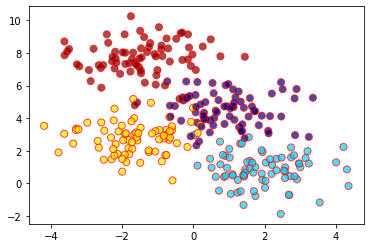

In [707]:
X,y  = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet', edgecolor='red', alpha=0.7)

In [708]:
from sklearn.tree import DecisionTreeClassifier

In [709]:
model = DecisionTreeClassifier()

In [710]:
tree1 = model.fit(Xtrain, ytrain)

In [711]:
np.c_[[1,2,3,4], [4,5,6,7]]

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])

In [712]:
def visualize_classifier(model, X,y, ax=None):
    ax = ax or plt.gca()
    
    ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='jet', edgecolor='grey', linewidth=1, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx,yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[np.ravel(xx), np.ravel(yy)]).reshape(xx.shape)
    
    n_cls = len(np.unique(y))
    
    contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_3784/374099992.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)


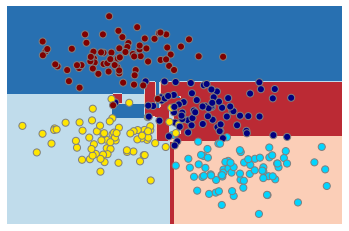

In [713]:
visualize_classifier(DecisionTreeClassifier(), X,y)

In [714]:
from sklearn.tree import plot_tree

[Text(479.3727272727272, 509.625, 'X[1] <= 5.826\ngini = 0.75\nsamples = 225\nvalue = [57, 55, 57, 56]'),
 Text(289.1454545454545, 441.675, 'X[0] <= -0.399\ngini = 0.67\nsamples = 166\nvalue = [53, 55, 57, 1]'),
 Text(121.74545454545454, 373.725, 'X[1] <= 4.075\ngini = 0.13\nsamples = 58\nvalue = [3, 0, 54, 1]'),
 Text(81.16363636363636, 305.775, 'gini = 0.0\nsamples = 51\nvalue = [0, 0, 51, 0]'),
 Text(162.3272727272727, 305.775, 'X[0] <= -0.921\ngini = 0.612\nsamples = 7\nvalue = [3, 0, 3, 1]'),
 Text(121.74545454545454, 237.825, 'X[1] <= 4.864\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1]'),
 Text(81.16363636363636, 169.875, 'X[1] <= 4.683\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1]'),
 Text(40.58181818181818, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(121.74545454545454, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(162.3272727272727, 169.875, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(202.90909090909

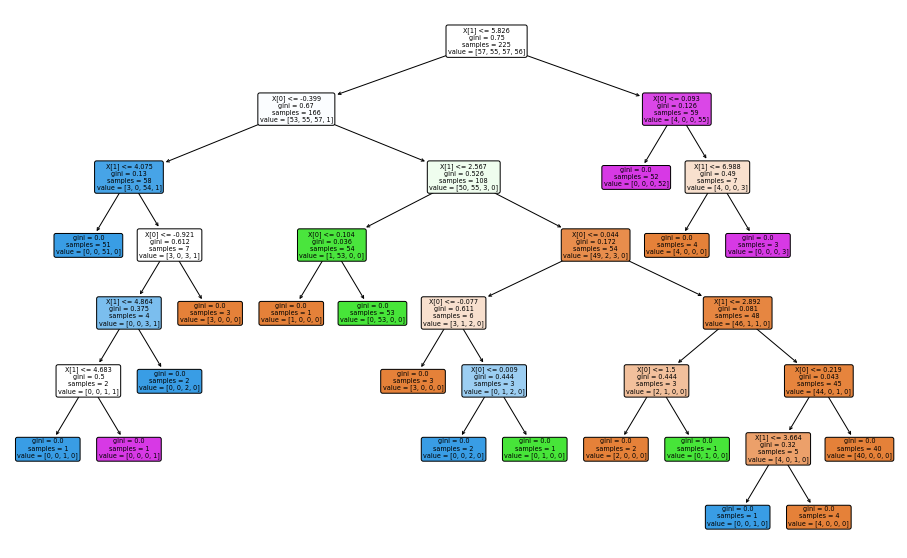

In [715]:
plt.figure(figsize=(16, 10))
plot_tree(tree1, filled=True, rounded=True)

In [716]:
from sklearn.metrics import plot_confusion_matrix

In [717]:
from sklearn.model_selection import train_test_split

In [718]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [719]:
tree = DecisionTreeClassifier().fit(Xtrain, ytrain)

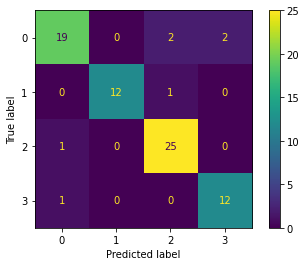

In [720]:
plot_confusion_matrix(tree, Xtest,ytest, values_format='d')

In [721]:
tree = DecisionTreeClassifier()

In [722]:
path = tree.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path.ccp_alphas
alphas = alphas[:-1]

In [723]:
fitted_models =[]
for alpha in alphas:
    model = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    modelfit = model.fit(Xtrain, ytrain)
    fitted_models.append(modelfit)

In [724]:
train_score =[modelfit.score(Xtrain, ytrain) for modelfit in fitted_models]
test_score = [modelfit.score(Xtest, ytest) for modelfit in fitted_models]

Text(0, 0.5, 'Accuracy')

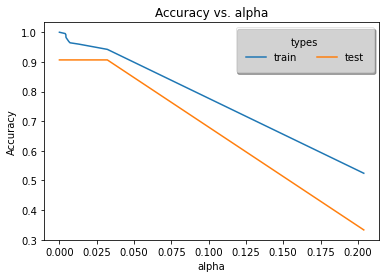

In [725]:
plt.plot(alphas, train_score, label='train')
plt.plot(alphas, test_score, label='test')
plt.legend(loc='best', frameon=True, shadow=True, ncol=2, title='types', borderpad=1, framealpha=0.5)
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')

In [726]:
model2 = DecisionTreeClassifier(ccp_alpha=0.007)

In [727]:
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='tree'>

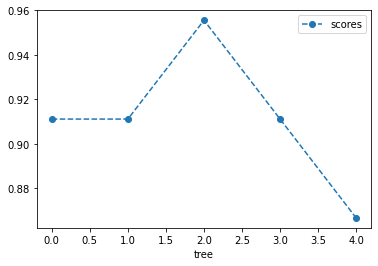

In [728]:
scores = cross_val_score(model2, Xtrain, ytrain, cv=5)
data = pd.DataFrame({'tree':range(5), 'scores':scores})
data.plot(x='tree', y='scores', marker='o', linestyle='--')

In [729]:
alpha_loop_values=[]
for i in alphas:
    model = DecisionTreeClassifier(ccp_alpha=i)
    scores = cross_val_score(model, Xtrain, ytrain, cv=5)
    alpha_loop_values.append([i, np.mean(scores), np.std(scores)])

In [730]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_score', 'STD'])

<AxesSubplot:xlabel='alpha'>

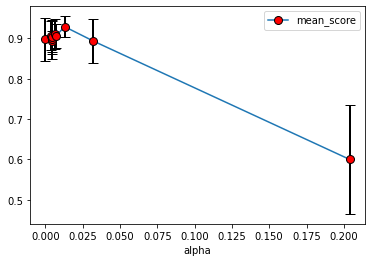

In [731]:
alpha_results.plot(x='alpha', y= 'mean_score', yerr='STD', capsize=5, marker='o', markerfacecolor='red', 
                   markeredgecolor='black', markersize=8, ecolor='black', elinewidth=2)

In [732]:
final_model = DecisionTreeClassifier(ccp_alpha=0.006).fit(Xtrain,ytrain)

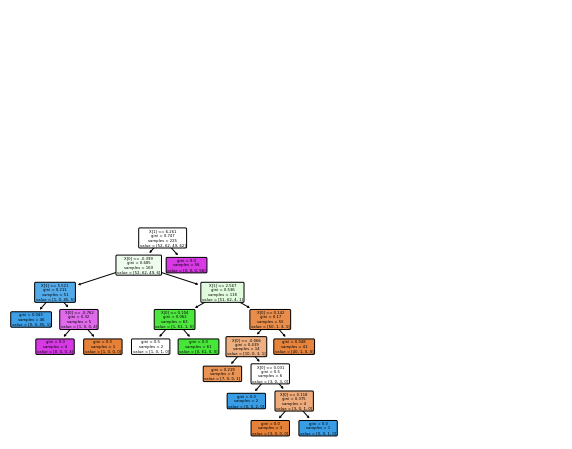

In [733]:
plot_tree(final_model, filled=True, rounded=True)
fig = plt.gcf()
fig.set_size_inches(10,8)

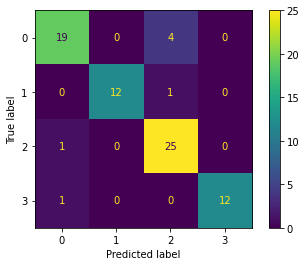

In [734]:
plot_confusion_matrix(final_model, Xtest, ytest)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_3784/374099992.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)


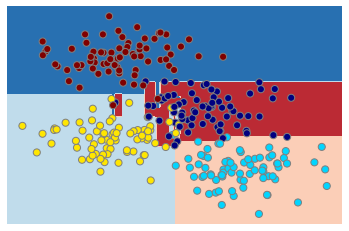

In [735]:
visualize_classifier(DecisionTreeClassifier(), X,y)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_3784/374099992.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)


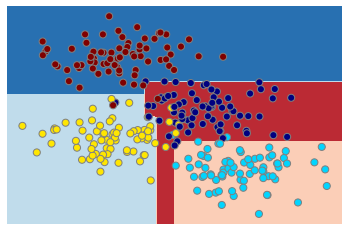

In [736]:
visualize_classifier(DecisionTreeClassifier(ccp_alpha=0.006), X,y) # slightly better in terms of overfiting

## how to deal with the overfit problem using BaggingClassifier

In [737]:
from sklearn.ensemble import BaggingClassifier

In [738]:
tree = DecisionTreeClassifier()
Bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_3784/374099992.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)


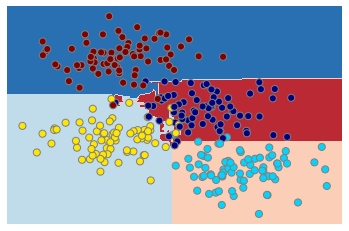

In [739]:
Bag.fit(X,y)
visualize_classifier(Bag, X,y)

In [740]:
from sklearn.ensemble import RandomForestClassifier

In [741]:
model = RandomForestClassifier(n_estimators=100).fit(X,y)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_3784/374099992.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, cmap='RdBu', clim= (y.min(), y.max()), levels=np.arange(n_cls + 1) - 0.5, zorder=1)


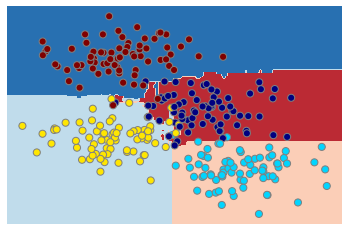

In [742]:
visualize_classifier(model, X, y)

##  Random Forest Regression

<ErrorbarContainer object of 3 artists>

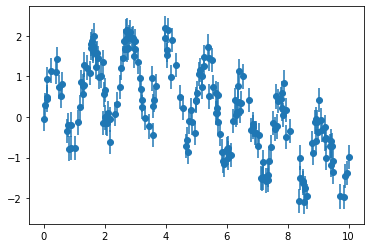

In [801]:
 
x = 10 * np.random.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * np.random.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

<ErrorbarContainer object of 3 artists>

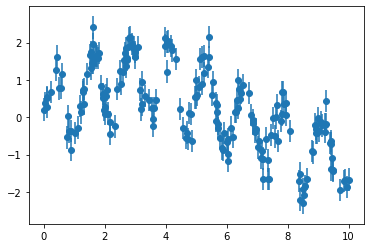

In [802]:
y = model(x)
plt.errorbar(x, y, yerr=0.3, fmt='o')

In [803]:
from sklearn.ensemble import RandomForestRegressor

In [804]:
forest = RandomForestRegressor(200) 
forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

In [805]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

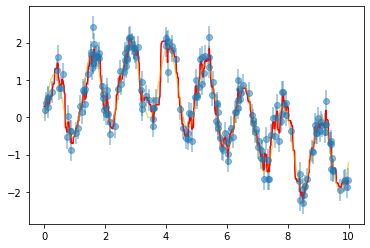

In [809]:
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-y', alpha=0.5)

# Example: Random Forest for Classifying Digits

In [810]:
from sklearn.datasets import load_digits 
digits = load_digits() 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [821]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

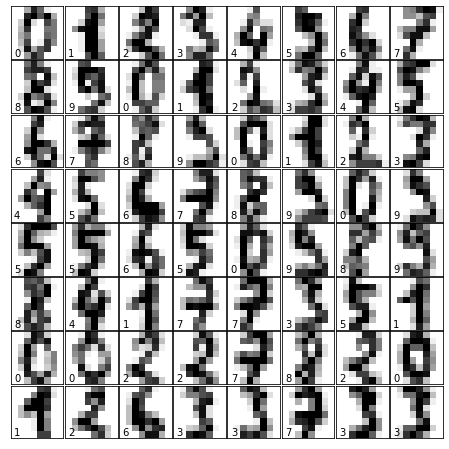

In [835]:
fig, axes = plt.subplots(8,8,figsize=(6,6), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.03, wspace=0.03, left=0, right=1, bottom=0, top=1))
for i , ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',interpolation='nearest')
    ax.text(0,7, str(digits.target[i]))

In [837]:
from sklearn.model_selection import train_test_split

In [838]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

In [839]:
model = RandomForestClassifier(n_estimators=1000)

In [840]:
ypred = model.fit(Xtrain,ytrain).predict(Xtest)

In [847]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      0.96      0.98        47
           2       0.95      1.00      0.97        38
           3       0.96      0.98      0.97        49
           4       1.00      1.00      1.00        47
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        49
           7       0.98      1.00      0.99        53
           8       0.95      0.95      0.95        41
           9       0.97      0.94      0.96        36

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



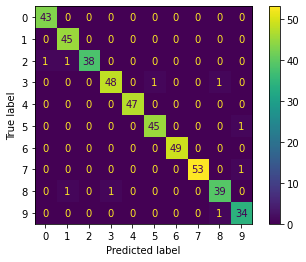

In [860]:
plot_confusion_matrix(model, Xtest, ytest)

In [852]:
from sklearn.metrics import confusion_matrix

In [853]:
mat = confusion_matrix(ypred, ytest)

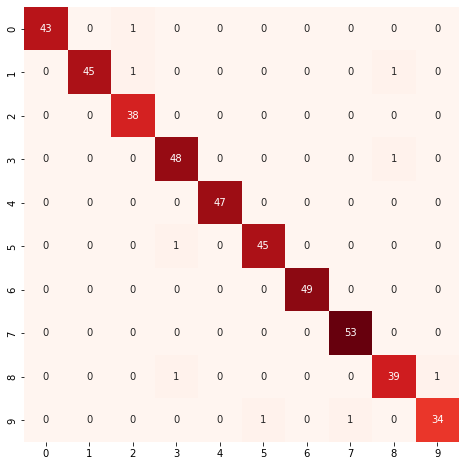

In [857]:
sns.heatmap(mat, annot=True, square=True, cmap='Reds', cbar=False)
fig = plt.gcf()
fig.set_size_inches(10,8)